In [7]:
#importing libraries
import snscrape.modules.twitter as sntwitter
import seaborn as sns
import pandas as pd
import warnings
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob
import sys
import tweepy
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob  
warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.font_manager as fm

## Scraping tweets using snscrape

In [15]:
attributes_container = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper('from:NikolPashinyan').get_items()):
    if i > 500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

#converting scraped tweets to a dataframe with columns Date, Likes, Source and tweets
tweets_nikol = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])
#tweets_nikol = pd.read_csv('nikol.csv')
tweets_nikol.dropna()

In [173]:
tweets_nikol['Tweets'] = tweets_nikol['Tweets'].str.replace('https', '')
tweets_nikol['Tweets'] = tweets_nikol['Tweets'].str.replace('t', '')
tweets_nikol['Tweets'] = tweets_nikol['Tweets'].str.replace('co', '')
tweets_nikol['Tweets'] = tweets_nikol['Tweets'].str.replace('de', '')

In [60]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:RobertKocharyan').get_items()):
    if i > 500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
    
#converting scraped tweets to a dataframe with columns Date, Likes, Source and tweets
tweets_robert = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"]
#tweets_robert.to_csv('kocharyan.csv')
tweets_robert = pd.read_csv('kocharyan.csv')
tweets_robert.dropna()

In [218]:
tweets_robert['Tweets'] = tweets_robert['Tweets'].str.replace('https', '')
tweets_robert['Tweets'] = tweets_robert['Tweets'].str.replace('t', '')
tweets_robert['Tweets'] = tweets_robert['Tweets'].str.replace('co', '')
tweets_robert['Tweets'] = tweets_robert['Tweets'].str.replace('o', '')

In [43]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:edmarukyan').get_items()):
    if i > 2500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
    
#converting scraped tweets to a dataframe with columns Date, Likes, Source and tweets
tweets_ed = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])
#tweets_ed.to_csv('marukyan.csv')
tweets_ed = pd.read_csv('marukyan.csv')
tweets_ed.dropna()

In [11]:
tweets_ed['Tweets'] = tweets_ed['Tweets'].str.replace('https', '')
tweets_ed['Tweets'] = tweets_ed['Tweets'].str.replace('t', '')
tweets_ed['Tweets'] = tweets_ed['Tweets'].str.replace('co', '')
tweets_ed['Tweets'] = tweets_ed['Tweets'].str.replace('o', '')
tweets_ed['Tweets'] = tweets_ed['Tweets'].str.replace('hps', '')

In [32]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:AraratMirzoyan').get_items()):
    if i>2500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
    
#converting scraped tweets to a dataframe with columns Date, Likes, Source and tweets
tweets_ar = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])
#tweets_ar.to_csv('mirzoyan.csv')
tweets_ar = pd.read_csv('mirzoyan.csv')
tweets_ar.dropna()

In [ ]:
tweets_ar['Tweets'] = tweets_ar['Tweets'].str.replace('https', '')
tweets_ar['Tweets'] = tweets_ar['Tweets'].str.replace('t', '')
tweets_ar['Tweets'] = tweets_ar['Tweets'].str.replace('co', '')
tweets_ar['Tweets'] = tweets_ar['Tweets'].str.replace('o', '')

In [ ]:
all = pd.concat([tweets_nikol, tweets_robert, tweets_ar, tweets_ed])
all.dropna()
all['Tweets'] = all['Tweets'].str.replace('https', '')
all['Tweets'] = all['Tweets'].str.replace('t', '')
all['Tweets'] = all['Tweets'].str.replace('co', '')

### In the following part of the code I scraped my preferred tweets and also after that I cleaned up the code a little, as there were some words like https that were messing with my overall picture
### I also created a column all, because some of the analyses are done with this column so I can have a bigger and overall picture

## Exolanatory Data Ananlysis

In [ ]:
# The following is specifying a font path so I can implement it in my wordclouds to understand Armenian language

font_path = "C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf"

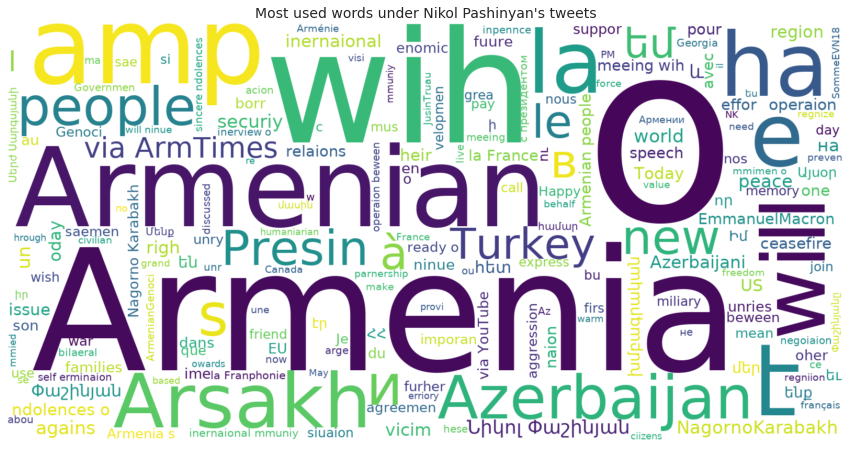

In [210]:
armenian_font = fm.FontProperties(fname=font_path, size=14)
text = " ".join(i for i in tweets_nikol.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", font_path=font_path).generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white", font_path=font_path).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Nikol Pashinyan's tweets", fontproperties=armenian_font)
plt.savefig('wordcloudnikol.png')
plt.show()

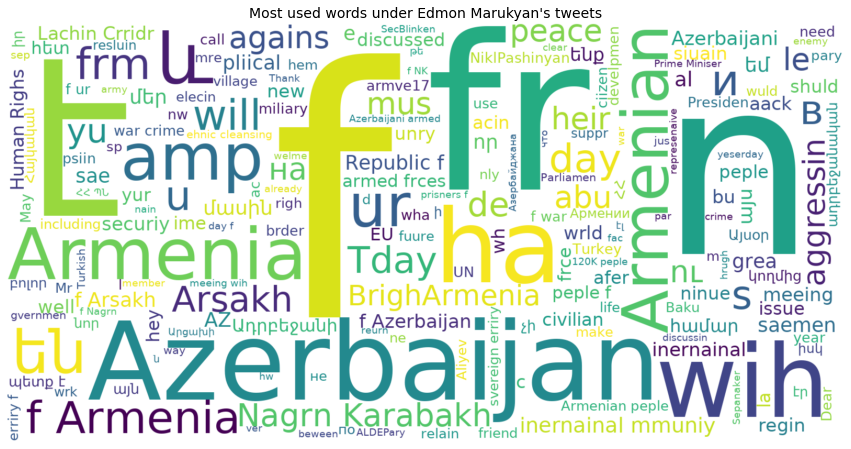

In [12]:
armenian_font = fm.FontProperties(fname=font_path, size=14)
text = " ".join(i for i in tweets_ed.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", font_path=font_path).generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white", font_path=font_path).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Edmon Marukyan's tweets", fontproperties=armenian_font)
plt.savefig('wordcloudedmon.png')
plt.show()

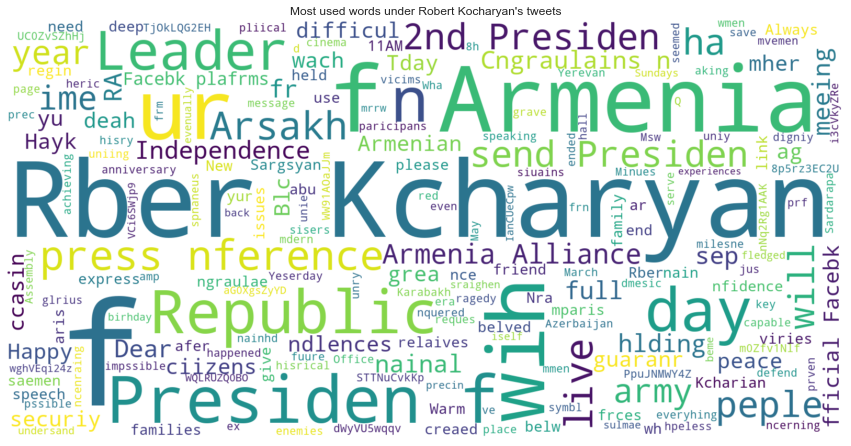

In [219]:
# I noticed that Robert Kocharyan's tweets do not nclude Armenian that is why I didn't specify font path here
text = " ".join(i for i in tweets_robert.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Robert Kocharyan's tweets")
plt.savefig('wordcloudrobert.png')
plt.show()

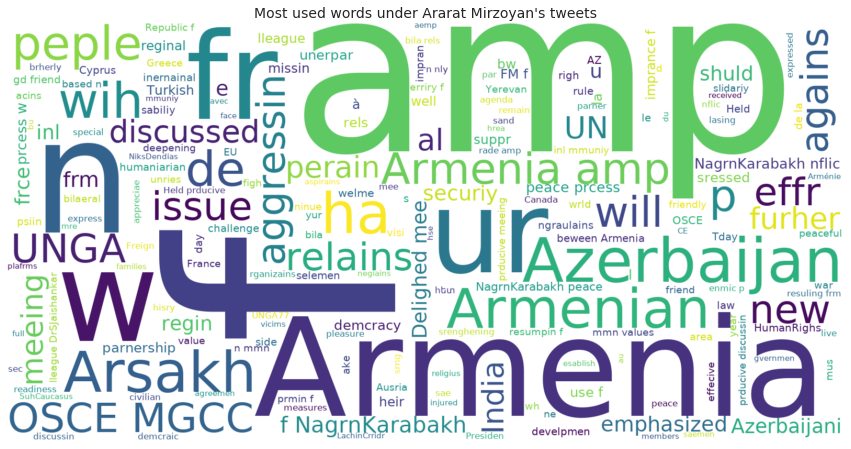

In [217]:
font_path = "C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf"

# create a font object for the Armenian font
armenian_font = fm.FontProperties(fname=font_path, size=14)

# generate the wordcloud using the Armenian font
text = " ".join(i for i in tweets_ar.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", font_path=font_path).generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white", font_path=font_path).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Ararat Mirzoyan's tweets", fontproperties=armenian_font)
plt.savefig('wordcloudararat.png')
plt.show()

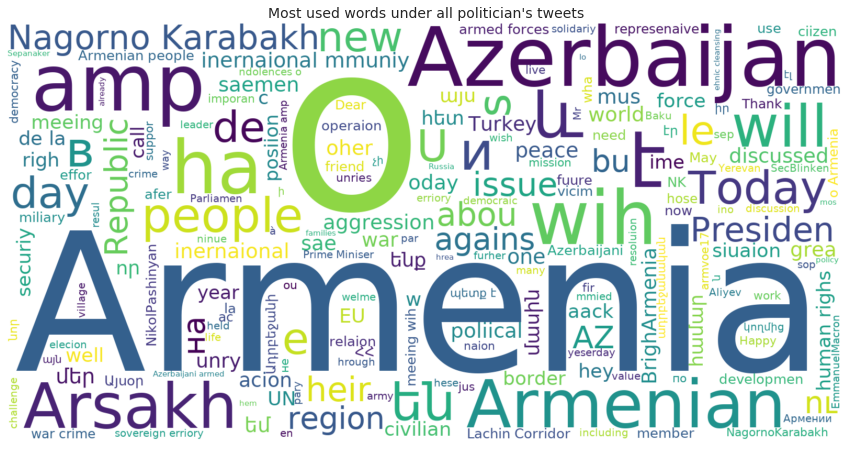

In [211]:
armenian_font = fm.FontProperties(fname=font_path, size=14)
text = " ".join(i for i in all.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", font_path=font_path).generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white", font_path=font_path).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under all politician's tweets", fontproperties=armenian_font)
plt.savefig('wordcloudall.png')
plt.show()

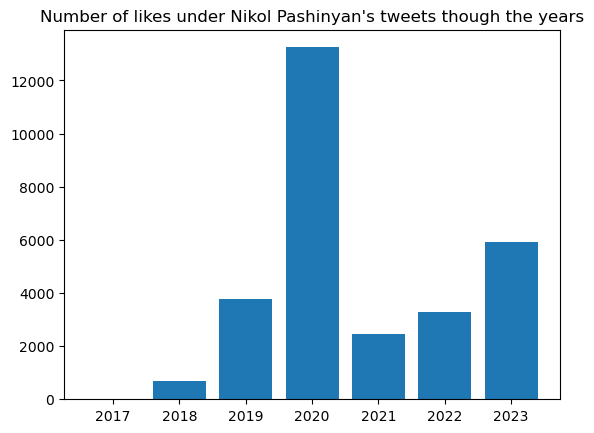

In [17]:
tweets_nikol['Date Created'] = pd.to_datetime(tweets_nikol['Date Created'])
tweets_nikol['year'] = tweets_nikol['Date Created'].apply(lambda x: x.year)
plt.bar(tweets_nikol['year'], tweets_nikol['Number of Likes'])
plt.title("Number of likes under Nikol Pashinyan's tweets though the years")
plt.savefig('likes.png')

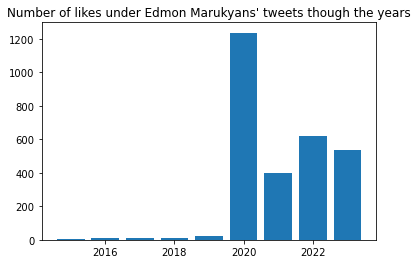

<Figure size 1080x1080 with 0 Axes>

In [53]:
tweets_ed['Date Created'] = pd.to_datetime(tweets_ed['Date Created'])
tweets_ed['year'] = tweets_ed['Date Created'].apply(lambda x: x.year)
plt.bar(tweets_ed['year'], tweets_ed['Number of Likes'])
plt.title("Number of likes under Edmon Marukyans' tweets though the years")
plt.figure(figsize=(15, 15))
plt.savefig('ed.png')

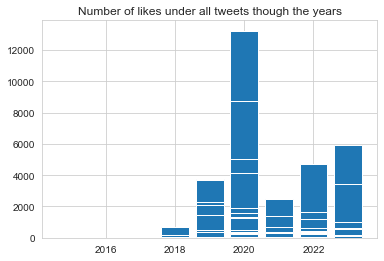

<Figure size 1080x1080 with 0 Axes>

In [204]:
all['Date Created'] = pd.to_datetime(all['Date Created'])
all['year'] = all['Date Created'].apply(lambda x: x.year)
plt.bar(all['year'], all['Number of Likes'])
plt.title("Number of likes under all tweets though the years")
plt.figure(figsize=(15, 15))
plt.savefig('alllikes.png')
plt.show()

## Analysis of tweets before and after 2020

In [18]:
#tweets_nikol['Date'] = tweets_nikol['Date Created'].dt.date
#del tweets_nikol['Date Created']

In [7]:
after = tweets_nikol.head(153)
after

Date Created  Number of Likes     Source of Tweet  \
0    2023-03-23 12:50:27+00:00             1565     Twitter Web App   
1    2023-02-13 10:38:12+00:00              463  Twitter for iPhone   
2    2023-02-06 08:57:57+00:00             5896     Twitter Web App   
3    2023-01-05 14:31:05+00:00             1335  Twitter for iPhone   
4    2022-12-19 05:42:07+00:00             1227     Twitter Web App   
..                         ...              ...                 ...   
148  2020-09-27 14:30:23+00:00             5718  Twitter for iPhone   
149  2020-09-27 13:37:23+00:00            13227  Twitter for iPhone   
150  2020-09-27 09:15:39+00:00             8734  Twitter for iPhone   
151  2020-09-27 07:53:17+00:00             3641  Twitter for iPhone   
152  2020-09-27 05:46:54+00:00             5032  Twitter for iPhone   

                                                Tweets  
0    There will be a #peace treaty between #Armenia...  
1    Dear Mr. @Christodulides, I'd like to extend m...  
2    Saddened by the news of the devastating earthq...  
3    Merry Christmas to all Armenians around the wo...  
4    8 days Lachin corridor is closed by #Az and pe...  
..                                                 ...  
148  #Armenia is guarantor of the security and inde...  
149  I call on the international community to use a...  
150  At the decision of the Government, martial law...  
151  Recent aggressive statements of #Azerbaijan'i ...  
152  Azerbaijan has launched a missile &amp; aerial...  

[153 rows x 4 columns]

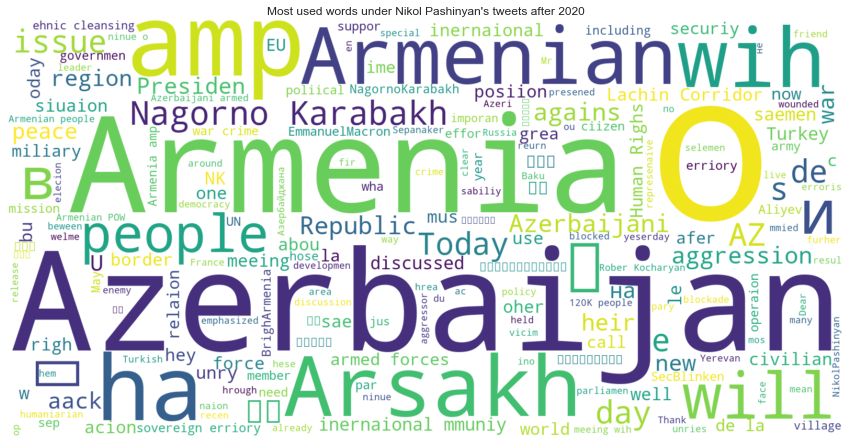

In [166]:
text = " ".join(i for i in after.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Nikol Pashinyan's tweets after 2020")
plt.savefig('wordcloudafter.png')
plt.show()

In [8]:
before = tweets_nikol.tail(348)
before

Date Created  Number of Likes     Source of Tweet  \
153  2020-09-26 15:16:28+00:00              888  Twitter for iPhone   
154  2020-09-25 18:21:15+00:00              835  Twitter for iPhone   
155  2020-09-25 17:24:01+00:00              468  Twitter for iPhone   
156  2020-09-22 11:04:35+00:00              487  Twitter for iPhone   
157  2020-09-21 11:39:34+00:00              458  Twitter for iPhone   
..                         ...              ...                 ...   
496  2017-11-20 09:25:28+00:00                3  Twitter Web Client   
497  2017-11-20 07:51:25+00:00                4  Twitter Web Client   
498  2017-11-17 07:30:50+00:00                3  Twitter for iPhone   
499  2017-11-16 09:44:48+00:00                3  Twitter for iPhone   
500  2017-11-15 13:39:46+00:00                3  Twitter Web Client   

                                                Tweets  
153  I would like to express sincere condolences to...  
154  #Armenia reaffirms its commitment to exclusive...  
155  On the #UN75 anniversary, we are compelled to ...  
156  Today, just like 75 years ago, the core task o...  
157  Strategic actions aimed at Armenia’s developme...  
..                                                 ...  
496  Այն, ինչ կատարվում է Վանաձորում, դե յուրե դիակ...  
497  ՌԴ ՊՆ պաշտոնական հեռուստաալիքն ընդհանրացրել է ...  
498  Հայաստանում աղքատներ չկան, ուռա՛, բարեկամներ. ...  
499  Կլոր գլուխ, քառակուսի սեղան, կամ հակառակը. խմբ...  
500  Եթե Սերժ Սարգսյանին մի բան պատահեց, մեր ազնիվ ...  

[348 rows x 4 columns]

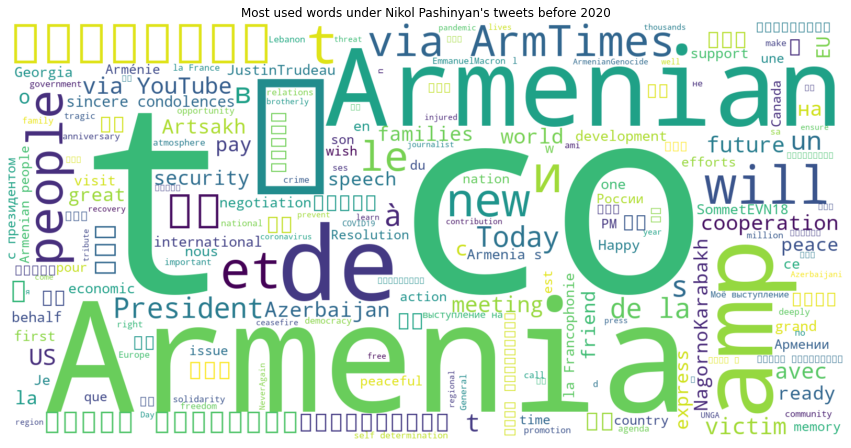

In [49]:
text = " ".join(i for i in before.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Nikol Pashinyan's tweets before 2020")
plt.savefig('wordcloudbefore.png')
plt.show()

In [159]:
all['Date Created'] = pd.to_datetime(all['Date Created'])
beforeall = all[all['Date Created'] < '2020-09-27']
afterall = all[all['Date Created'] >= '2020-09-27']

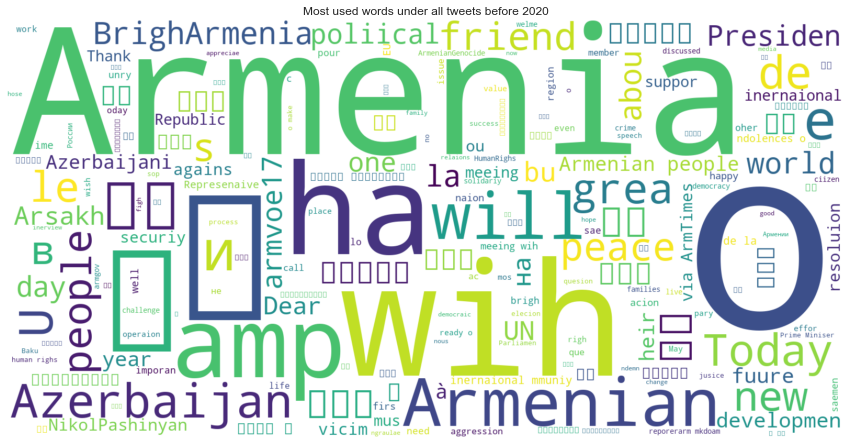

In [163]:
text = " ".join(i for i in before.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under all tweets before 2020")
plt.savefig('wordcloudbeforeall.png')
plt.show()

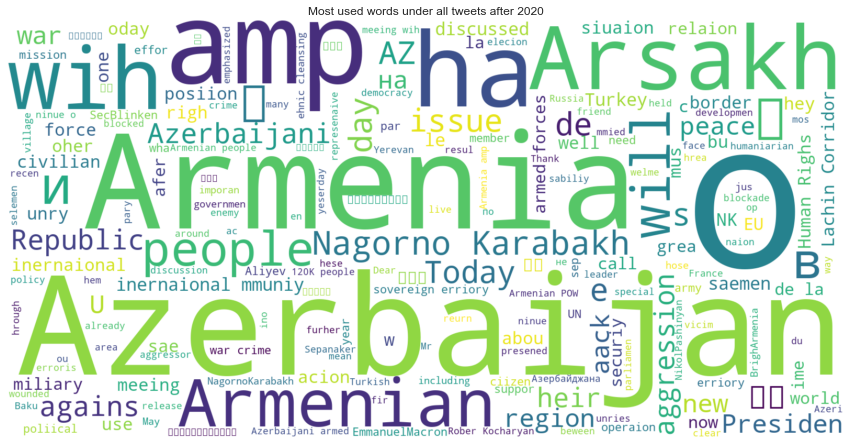

In [165]:
text = " ".join(i for i in after.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under all tweets after 2020")
plt.savefig('wordcloudafterall.png')
plt.show()

## Polarity and Sentiment Analysis

In [10]:
tweets_nikol['polarity'] = tweets_nikol['Tweets'].apply(lambda x: TextBlob(x).polarity)

In [64]:
tweets_robert['polarity'] = tweets_robert['Tweets'].apply(lambda x: TextBlob(x).polarity)

In [80]:
tweets_ed['polarity'] = tweets_ed['Tweets'].apply(lambda x: TextBlob(x).polarity)

In [81]:
tweets_ar['polarity'] = tweets_ar['Tweets'].apply(lambda x: TextBlob(x).polarity)

In [167]:
all['polarity'] = all['Tweets'].apply(lambda x: TextBlob(x).polarity)

In [66]:
label = []
for pol in tweets_robert['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
tweets_robert['label'] = label

In [82]:
label = []
for pol in tweets_ar['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
tweets_ar['label'] = label

In [83]:
label = []
for pol in tweets_ed['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
tweets_ed['label'] = label

In [11]:
label = []
for pol in tweets_nikol['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
tweets_nikol['label'] = label

In [169]:
label = []
for pol in all['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
all['label'] = label

### The above chunks of code are for adding two columns to our datasets - polarity and sentiment. 
### Column polarity is for giving a score to each tweet ranginf from -1 to +1, from negative to positive respectively
### The column sentiment just classifies Tweet as positive, negative, neutral

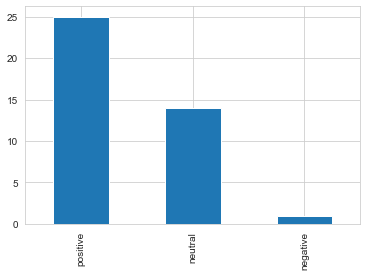

In [67]:
tweets_robert.label.value_counts().plot(kind='bar')

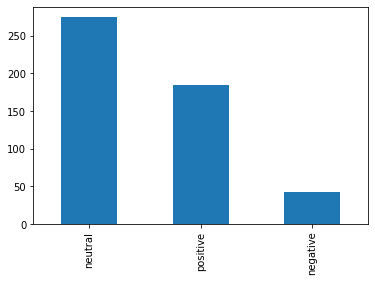

In [13]:
tweets_nikol.label.value_counts().plot(kind='bar')

In [14]:
after = tweets_nikol.head(153)

In [15]:
before = tweets_nikol.tail(348)

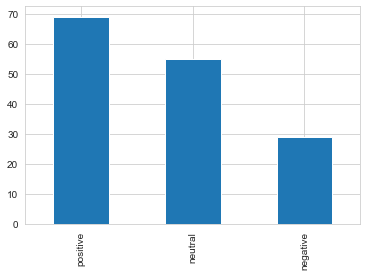

In [59]:
after.label.value_counts().plot(kind='bar')

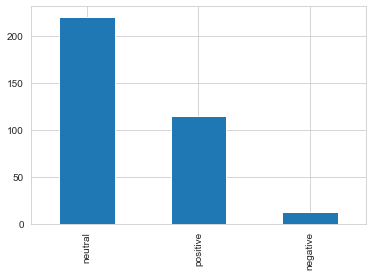

In [58]:
before.label.value_counts().plot(kind='bar')

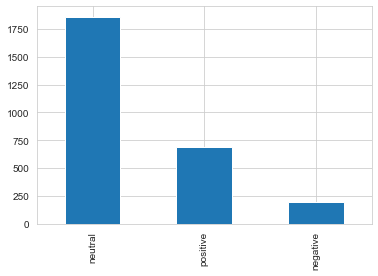

In [170]:
all.label.value_counts().plot(kind='bar')

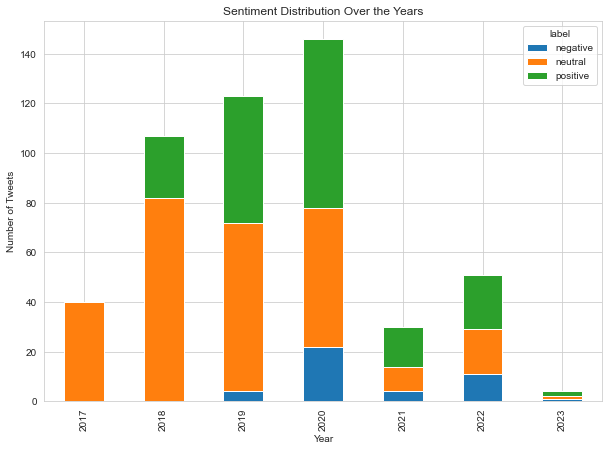

In [149]:
grouped = tweets_nikol.groupby([pd.to_datetime(tweets_nikol['Date Created']).dt.year, 'label'])['label'].count()


pivot = grouped.unstack(level=-1)
pivot.plot(kind='bar', stacked=True, figsize=(10, 7))


plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.savefig('sentiments_nikol.png')
plt.show()

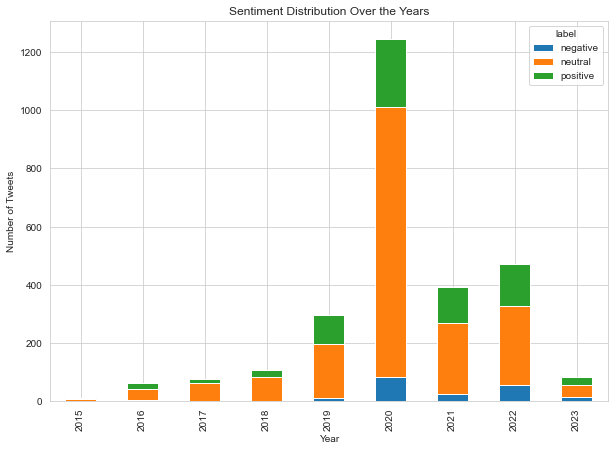

In [226]:
grouped = all.groupby([pd.to_datetime(all['Date Created']).dt.year, 'label'])['label'].count()

# Unstack the data to create a pivot table with sentiment labels as columns and years as rows
pivot = grouped.unstack(level=-1)

# Plot the pivot table as a stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

# Set the chart title and axes labels
plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

# Show the chart
plt.savefig('sentiment_distributionall.png')
plt.show()

In [40]:
tweets_nikol['Date Created'] = pd.to_datetime(tweets_nikol['Date Created'])
tweets_nikol['hour'] = tweets_nikol['Date Created'].dt.hour

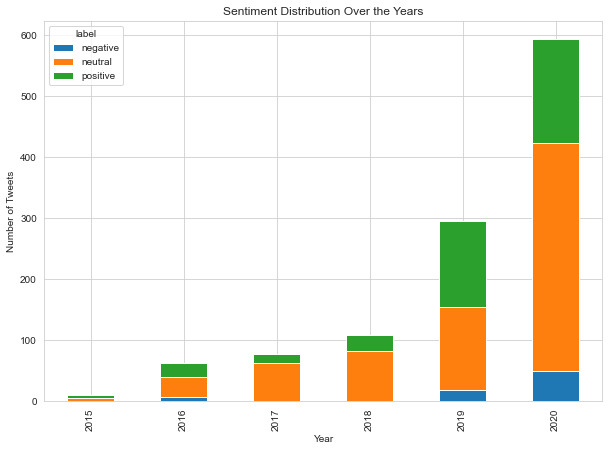

In [171]:
grouped = beforeall.groupby([pd.to_datetime(beforeall['Date Created']).dt.year, 'label'])['label'].count()

# Unstack the data to create a pivot table with sentiment labels as columns and years as rows
pivot = grouped.unstack(level=-1)

# Plot the pivot table as a stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

# Set the chart title and axes labels
plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

# Show the chart
plt.savefig('sentiments_beforeall.png')
plt.show()

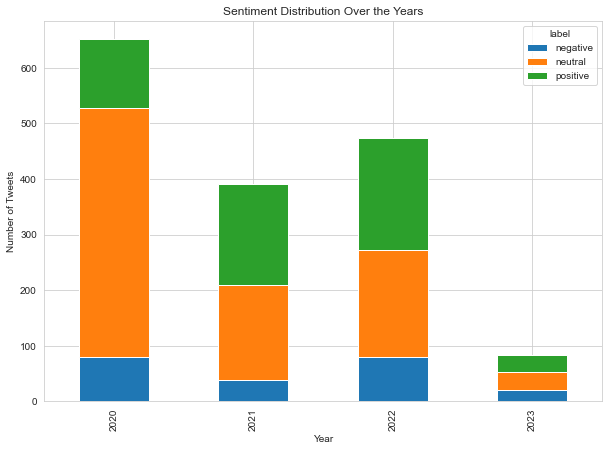

In [172]:
grouped = afterall.groupby([pd.to_datetime(afterall['Date Created']).dt.year, 'label'])['label'].count()

# Unstack the data to create a pivot table with sentiment labels as columns and years as rows
pivot = grouped.unstack(level=-1)

# Plot the pivot table as a stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

# Set the chart title and axes labels
plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

# Show the chart
plt.savefig('sentiments_afterall.png')
plt.show()

In [71]:
tweets_robert['Date Created'] = pd.to_datetime(tweets_robert['Date Created'])
tweets_robert['hour'] = tweets_robert['Date Created'].dt.hour

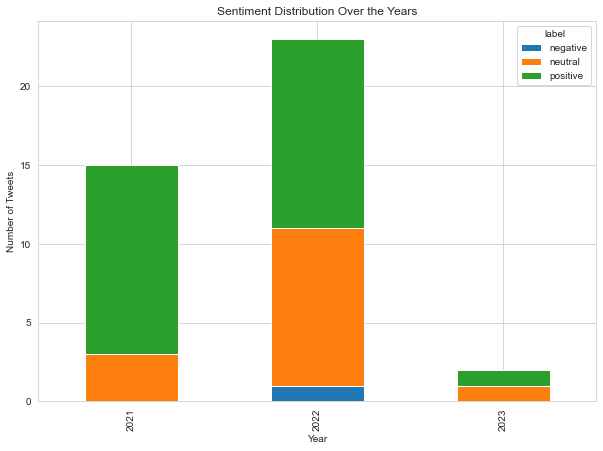

In [78]:
grouped = tweets_robert.groupby([pd.to_datetime(tweets_robert['Date Created']).dt.year, 'label'])['label'].count()

# Unstack the data to create a pivot table with sentiment labels as columns and years as rows
pivot = grouped.unstack(level=-1)

# Plot the pivot table as a stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

# Set the chart title and axes labels
plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

# Show the chart
plt.show()

In [176]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

# Tokenize the tweets and remove stop words
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

# Create a dictionary and corpus
texts = all['Tweets'].apply(tokenize)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Perform topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.011*"на" + 0.006*"не" + 0.004*"одкб" + 0.004*"также" + 0.004*"դրության" + 0.003*"азербайджана" + 0.003*"из" + 0.003*"по" + 0.003*"armgov" + 0.003*"рф"
Topic: 1 
Words: 0.027*"armenia" + 0.012*"ha" + 0.008*"wih" + 0.008*"armenian" + 0.007*"brigharmenia" + 0.007*"grea" + 0.006*"azerbaijan" + 0.006*"day" + 0.004*"dear" + 0.004*"today"
Topic: 2 
Words: 0.008*"արտակարգ" + 0.006*"на" + 0.005*"tha" + 0.005*"proud" + 0.005*"что" + 0.003*"это" + 0.003*"россии" + 0.003*"наших" + 0.003*"по" + 0.003*"для"
Topic: 3 
Words: 0.024*"la" + 0.014*"armvoe" + 0.010*"le" + 0.007*"les" + 0.007*"pour" + 0.006*"arménie" + 0.005*"du" + 0.005*"nous" + 0.004*"des" + 0.004*"en"
Topic: 4 
Words: 0.005*"border" + 0.004*"bad" + 0.004*"խնդրի" + 0.003*"enemy" + 0.003*"փաստացի" + 0.003*"showed" + 0.003*"siuaion" + 0.003*"july" + 0.003*"equipmen" + 0.003*"haruyunyan"
Topic: 5 
Words: 0.008*"die" + 0.005*"poliics" + 0.004*"արդեն" + 0.004*"angeles" + 0.003*"humaniy" + 0.003*"նույն" + 0.003*"raffiellio" 

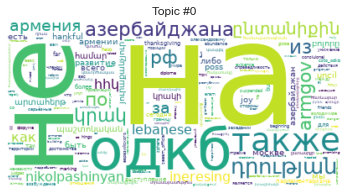

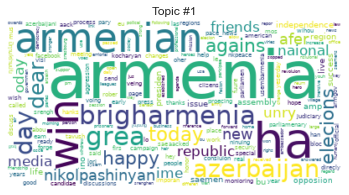

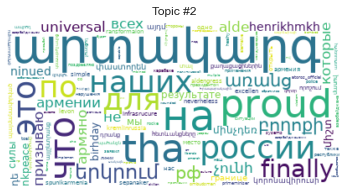

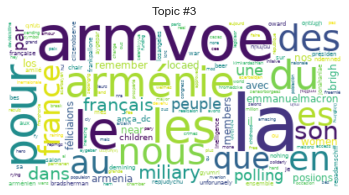

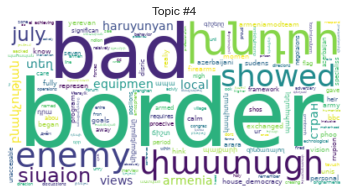

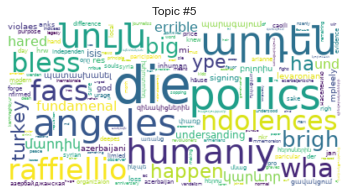

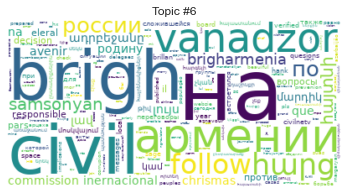

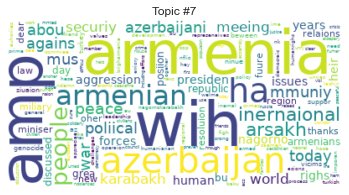

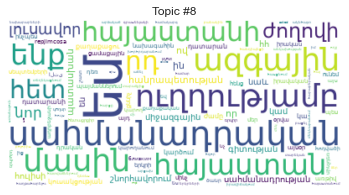

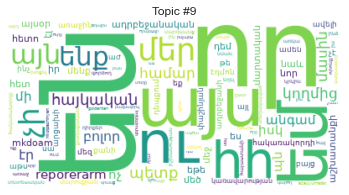

In [184]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import codecs

# Set Armenian font path
font_path = "C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf"

# Generate word clouds for each topic
for t in range(lda_model.num_topics):
    # Extract top words for the topic
    top_words = dict(lda_model.show_topic(t, 200))

    # Convert top words to Unicode string
    top_words_str = {k: float(v) for k, v in top_words.items()}

    # Generate word cloud
    wordcloud = WordCloud(font_path=font_path, background_color="white").generate_from_frequencies(top_words_str)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()



In [236]:
# Set Armenian font path
font_path = "C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf"

# Generate word clouds for each topic
for t in range(lda_model.num_topics):
    # Extract top words for the topic
    top_words = dict(lda_model.show_topic(t, 200))

    # Get a list of the top words for the topic
    top_words_list = list(top_words.keys())

    # Print the top words for the topic
    print("Topic #" + str(t) + ": " + str(top_words_list))


Topic #0: ['են', 'որ', 'եմ', 'այս', 'հհ', 'на', 'ենք', 'մեր', 'ու', 'մասին', 'հետ', 'չի', 'համար', 'հայաստանի', 'այն', 'պետք', 'հայկական', 'նոր', 'կողմից', 'սահմանադրական', 'մի', 'այսօր', 'не', 'պն', 'էր', 'բոլոր', 'նաև', 'անգամ', 'reporerarm', 'ոչ', 'ազգային', 'ին', 'իր', 'իսկ', 'ադրբեջանական', 'армении', 'по', 'armvoe', 'mkdoam', 'ուղղությամբ', 'հայաստան', 'մարտական', 'ես', 'եթե', 'էլ', 'die', 'արտակարգ', 'հանրապետության', 'րդ', 'հակառակորդի', 'մենք', 'մեջ', 'իմ', 'ադրբեջանի', 'հետո', 'այդ', 'ամեն', 'լուսավոր', 'что', 'также', 'ժողովի', 'աշխատանքի', 'քաղաքական', 'մեծ', 'թե', 'из', 'դեմ', 'աթս', 'для', 'եք', 'մեզ', 'азербайджана', 'ինչպես', 'россии', 'բայց', 'չէ', 'էդմոն', 'արցախի', 'հայ', 'առաջին', 'рф', 'ով', 'nikolpashinyan', 'տնտեսական', 'այլ', 'կամ', 'ինչ', 'աժ', 'փաշինյան', 'կարող', 'առաջ', 'հակառակորդը', 'դեպքում', 'ավելի', 'քանի', 'նիկոլ', 'армения', 'սա', 'մարուքյան', 'կառավարության', 'պատասխան', 'պբ', 'զու', 'շատ', 'մեկ', 'խոցել', 'նման', 'մարդկանց', 'տեղակայված', 'դիրքեր', 